# Cosa faremo

### Una banca si accorge di perdere molto denaro nei prestiti di piccola entità!!!
### Il vostro lavoro, in quanto consulenti, sarà quello di:
- sviluppare una pagina web per la richiesta di nuovi prestiti
- sviluppare un'analisi per capire quali prestiti sono rischiosi e quali no
- applicare questa analisi in modo che le richieste vengano filtrate a priori

# Cosa abbiamo a disposizione

## file csv con i prestiti di piccola taglia degli ultimi due anni

# Tipico Workflow di ML

1. Acquisizione Dati
2. Pulizia Dati
3. Esplorazione Visiva
4. Trasformazione (eventuale) e Scelta del Modello
5. Misurazione delle performance del Modello

# Con l'aggiunta di:

6. Deploying del Modello as a service
7. Collegamento dell'API alla Web Application

# Acquisizione Dati

In [1]:
import pandas as pd

df = pd.read_csv("storico_prestiti.csv")
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


# Pulizia dei Dati

# Di che tipi sono i dati presenti nel DataFrame?

In [2]:
df.dtypes

default        int64
amount         int64
grade         object
years        float64
ownership     object
income       float64
age            int64
dtype: object

# Quanti dati ho?

In [3]:
print("Shape: {}".format(df.shape))
print("Colonne: {}".format(df.columns))

Shape: (7727, 7)
Colonne: Index(['default', 'amount', 'grade', 'years', 'ownership', 'income', 'age'], dtype='object')


In [4]:
df.describe()

,default,amount,years,income,age
count,7727.000000,7727.000000,7448.000000,7.727000e+03,7727.000000
mean,0.478452,9453.345412,6.086332,6.337197e+04,27.542125
std,0.499568,6298.595800,6.700758,4.687195e+04,6.132121
min,0.000000,500.000000,0.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,2.000000,3.700000e+04,23.000000
50%,0.000000,8000.000000,4.000000,5.400000e+04,26.000000
75%,1.000000,12000.000000,8.000000,7.679650e+04,30.000000
max,1.000000,35000.000000,62.000000,1.200000e+06,94.000000


# Come verifico se ho dei valori nulli?

In [5]:
df.isnull().head()

,default,amount,grade,years,ownership,income,age
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


# Come verifico se ho dei valori nulli?

In [6]:
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

# Cosa faccio con queste righe?

1. Elimino le righe (279 su 7727)
2. Sostituisco con un valore soglia (es. 9999 -> Errore nell'importazione)
3. Sostituisco applicando una funzione (random tra le altre righe, media, valore stimato da un altro modello)

# Scelgo la 3 (e uso la media aritmetica)

In [7]:
import numpy as np

df.years = df.years.fillna(np.mean(df.years))

# GRAFICI
### (Data Visualization)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Univariate Analysis
## grafici riferiti all'output o a una singola feature
### feature = una colonna del dataset che non sia "default"

# Prestiti andati a buon fine o meno

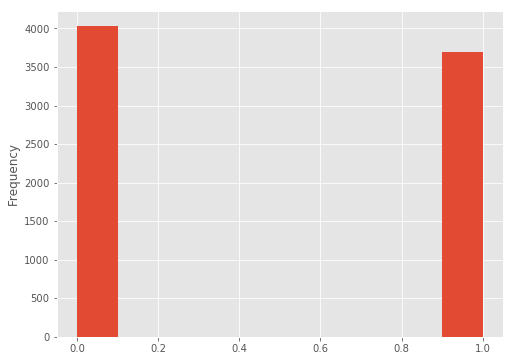

In [9]:
df.default.plot.hist()

# Grafico dei livelli di solvibilità del cliente

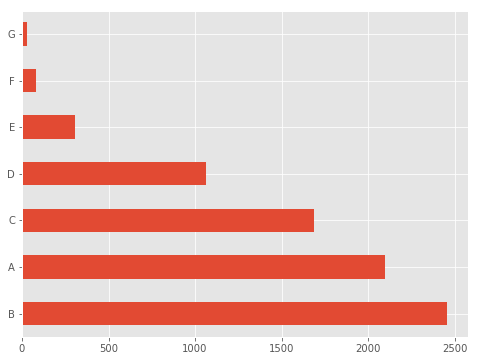

In [10]:
df.grade.value_counts().plot.barh()

# Età dei richiedenti

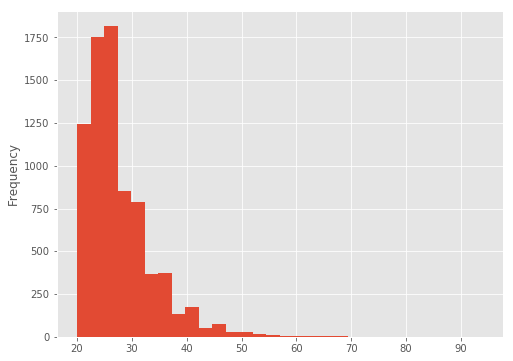

In [11]:
df.age.plot.hist(bins=30)

# Links

- https://github.com/amitkaps/full-stack-data-science (Repo originale del workshop)

- https://github.com/alessandrocucci/mlaas (Repo di queste slides)

### Q&A Slide